In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [210]:
## Action Value Methods
import numpy as np
import matplotlib.pyplot as plt

class ActionValueMethod(object):
    '''
    SampleAverage Action Value Method
    '''
    def __init__(self, size_action_space):
        self.action_attempts = np.zeros(size_action_space)
        self.value_estimates = np.zeros(size_action_space)

    def add_observation(self, action, value):
        self.action_attempts[action] += 1
        self.value_estimates[action] += (1 / self.action_attempts[action]) * (reward - self.value_estimates[action])

    def reset(self):
        size_action_space = len(self.value_estimates)
        self.action_attempts = np.zeros(size_action_space)
        self.value_estimates = np.zeros(size_action_space)

class EpsilonGreedyMethod(ActionValueMethod):
    '''
    Epsilon Greedy Method
    '''
    def __init__(self, size_action_space, eps):
        super().__init__(size_action_space)
        self.eps = eps

    def choose(self):
        if np.random.random() < self.eps:
            return np.random.choice(len(self.value_estimates))
        else:
            # Tie breaking by first in index. Will update to randomly choose
            # on tie occurence
            return np.argmax(self.value_estimates)

class GreedyMethod(EpsilonGreedyMethod):
    '''
    Greedy Method
    '''
    def __init__(size_action_space):
        super().__init__(size_action_space, eps=0)

class MultiArmedBanditTestBed(object):
    '''
    K-Armed Bandit Test Bed
    '''
    def __init__(self, k=10):
        self.k = k
        self.action_reward_means = np.random.normal(0, 1, k)

    def pull(self, action, tries=1):
        return np.random.normal(self.action_reward_means[action], 1, tries)
    
    def visualize(self):
        data_to_plot = []
        for action in range(self.k):
            data_to_plot.append(self.pull(action, 1000))

        # Create a figure instance
        fig = plt.figure()

        # Create an axes instance
        ax = fig.add_axes([0,0,1,1])

        plt.xticks(np.arange(self.k + 1))
        plt.title(f"{self.k}-Armed Bandit TestBed")
        plt.xlabel("Action Selection")
        plt.ylabel("Reward Distribution")

        # Create the boxplot
        bp = ax.violinplot(data_to_plot)
        plt.show()

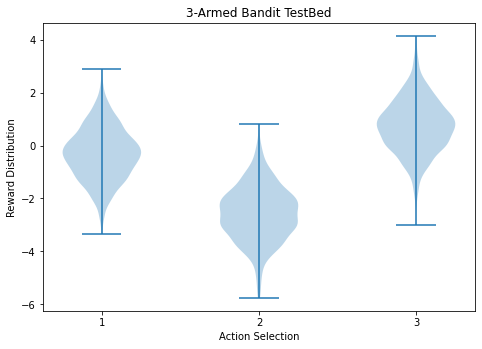

In [215]:
env = ArmedBanditTestBed(k=3)
env.visualize()

In [195]:
def compare_policies(size_action_space, steps_per_run=1000, runs_per_experiment=2000):
    results = {}
    
    for eps in [0, 0.01, 0.1]:
        policy = EpsilonGreedyMethod(size_action_space, eps)
        
        experiment_hist = []
        for run in range(runs_per_experiment):
            env = ArmedBanditTestBed(k=size_action_space)
            
            run_hist = []
            for step in range(steps_per_run):
                
                action = policy.choose()
                reward = env.pull(action)
                policy.add_observation(action, reward)
                run_hist.append(reward)
            
            experiment_hist.append(run_hist)
            policy.reset()
            
        results[eps] = np.mean(experiment_hist, 0) # Average Reward
    
    return results

In [196]:
res = compare_policies(20, 1000, 2000)

In [207]:
def visualize_results(res):
    f, ax = plt.subplots(1)
    
    plt.plot(res[0], label="ɛ = 0")
    plt.plot(res[0.01], label="ɛ = 0.01")
    plt.plot(res[0.1], label="ɛ = 0.1")

    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.title('ɛ-Greedy Experiments')

    plt.legend()
    
    ax.set_ylim(bottom=0)

    plt.show()

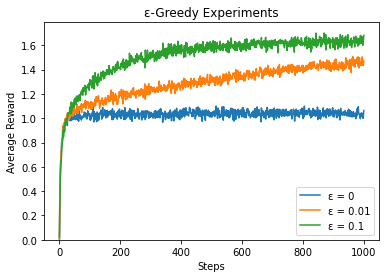

In [208]:
visualize_results(res)